# PSET 3

Compensators and Stability

In [45]:
%Compensators and Stability 
s = tf('s');
K = 2 ;
Kd = 3;
Ki = 2;
p = 1;
z = 1;
%syms K Kd Ki p z 
H = 1000/(s^2*(s+10));

Hp = K;
Hd = K*s;
Hi = K/s;
Hpd= K*(1+Kd*s/K);
Hpi = K*(1+Ki/(K*s));
Hpid =K*(1+Kd/K*s+Ki/(K*s)) ;
Hlead = K * (p/z)*(s-z)/(s-p);
Hlag = K * (p/z)*(s-z)/(s-p);

systemp = feedback(H*Hp,1);
systemd = feedback(H*Hd,1);
systemi = feedback(H*Hi,1);
systempd = feedback(H*Hpd,1);
systempi = feedback(H*Hpi,1);
systempid = feedback(H*Hpid,1);
systemlead = feedback(H*Hlead,1);
systemlag = feedback(H*Hlag,1);

p = pole(systemp)
d= pole(systemd)
i = pole(systemi)
pd = pole(systempd)
pi = pole(systempi)
pid = pole(systempid)
lead = pole(systemlead)
lag = pole(systemlag)


p =

   -16.9562e+000 +  0.0000e+000i
     3.4781e+000 + 10.2885e+000i
     3.4781e+000 - 10.2885e+000i


d =

     0.0000e+000 +  0.0000e+000i
    -5.0000e+000 + 44.4410e+000i
    -5.0000e+000 - 44.4410e+000i


i =

    -8.0902e+000 +  2.6287e+000i
    -8.0902e+000 -  2.6287e+000i
     3.0902e+000 +  4.2533e+000i
     3.0902e+000 -  4.2533e+000i


pd =

    -4.6660e+000 + 54.5160e+000i
    -4.6660e+000 - 54.5160e+000i
  -668.0549e-003 +  0.0000e+000i


pi =

   -16.7235e+000 +  0.0000e+000i
     3.8595e+000 + 10.2582e+000i
     3.8595e+000 - 10.2582e+000i
  -995.5575e-003 +  0.0000e+000i


pid =

    -4.6669e+000 + 54.5099e+000i
    -4.6669e+000 - 54.5099e+000i
  -333.0583e-003 +746.5069e-003i
  -333.0583e-003 -746.5069e-003i


lead =

   -16.9562e+000 +  0.0000e+000i
     3.4781e+000 + 10.2885e+000i
     3.4781e+000 - 10.2885e+000i
     1.0000e+000 +  0.0000e+000i


lag =

   -16.9562e+000 +  0.0000e+000i
     3.4781e+000 + 10.2885e+000i
     3.4781e+000 - 10.2885e+000i
     1.0000e

In [46]:
s = tf('s');
H = 10^6/(s*(s/(10^5)+1)*(s/(3*10^5)+1)+0.01*10^6)
sys = feedback(H,1)


H =
 
                3e16
  --------------------------------
  s^3 + 400000 s^2 + 3e10 s + 3e14
 
Continuous-time transfer function.


sys =
 
                 3e16
  -----------------------------------
  s^3 + 400000 s^2 + 3e10 s + 3.03e16
 
Continuous-time transfer function.




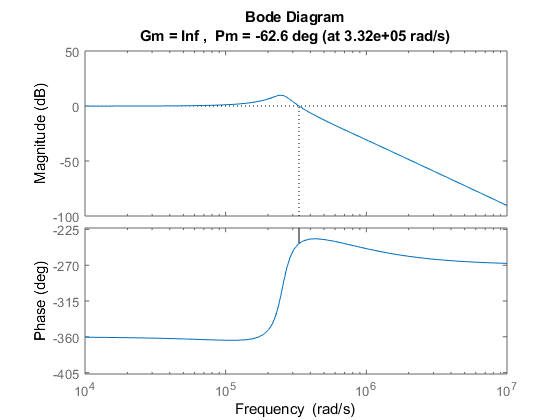

In [47]:
margin(sys)

## Delay

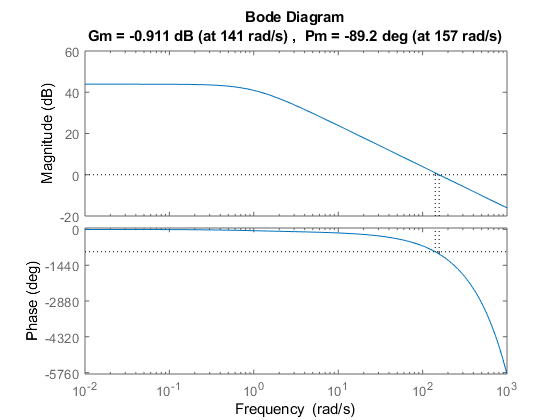

In [48]:
T=0.1; %0.00155;
Hd = exp(-(T*s));
K=5*3.14;
Hp = 10/(s+1);
margin(Hp*K*Hd)

## Plant Matching

In [49]:
Hc1 = 1/s;
Hc2 = 7*10^7*(10^-7*s+1)/(10^-8*s+1);
Hc3 = 10*sqrt(2)*(0.1*s+1)/(s+1);
Hc4 = 100;
Hc5 = (10^-3*s+1)/(10^-4*s+1);
Hc6 = 10*(10*s+1)/(1000*s+1);

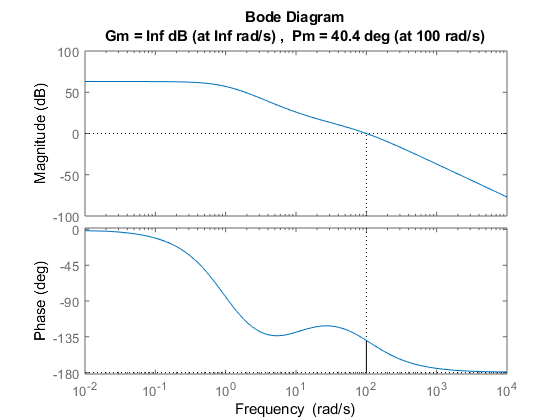

In [50]:
Hp1 = 10^2/((s+1)*(10^-2*s+1));
margin(Hp1*Hc3)

In [56]:
%plot native
Hp2 = sqrt(10)*10^6/(s^2*(10^-5*s+1));
margin(Hp2*Hc5)

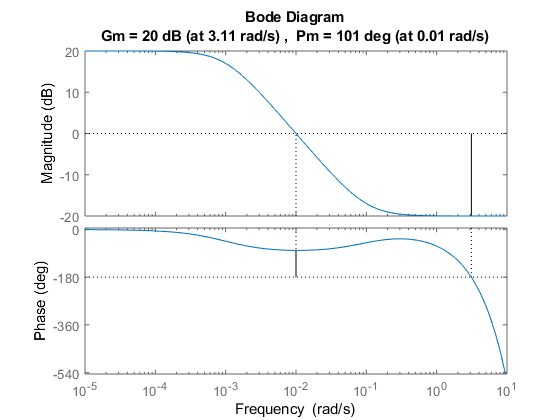

In [65]:
Hp3 = exp(-s);
margin(Hp3*Hc6)

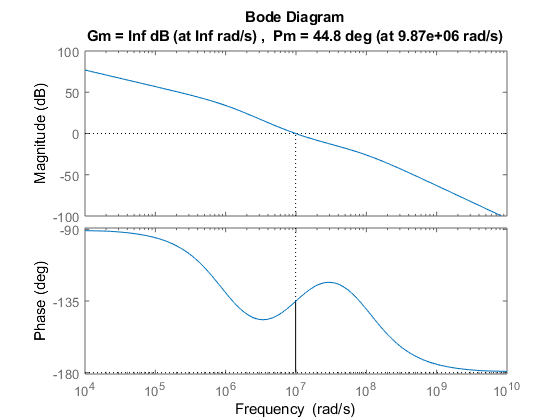

In [66]:
Hp4 = 1/(s*(10^-6*s+1));
margin(Hp4*Hc2)

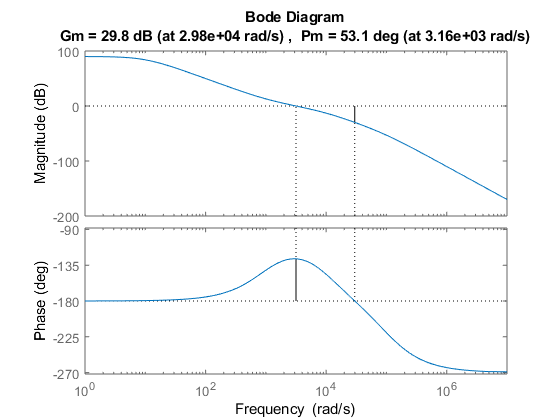

In [68]:
Hp5 = sqrt(10)*10^4/((0.1*s+1)*(0.1*s-1)*(10^-5*s+1));
margin(Hp5*Hc5)

In [1]:
Hp6 = 10^4*(s+0.01)^2/(s+1)^3;
margin(Hp6*Hc4)

Undefined function or variable 's'.



# Pset 4


ans =

   1.0e+02 *

  -2.0310 + 0.0000i
  -0.0945 + 0.2265i
  -0.0945 - 0.2265i


ans =

   32.7103




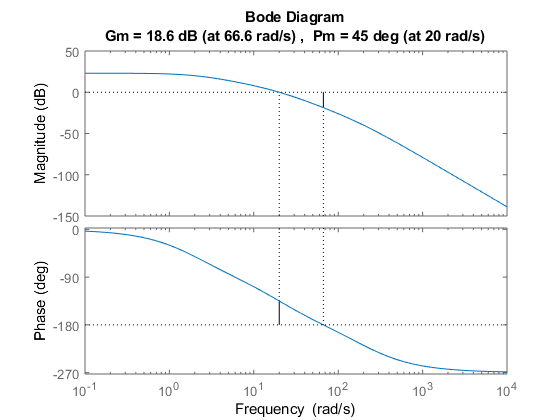

In [64]:
s = tf('s');
Hs = 200*20*1000/((s+2)*(s+20)*(s+200));
Gi =35;% %0.02852;
margin(Hs/Gi)
sys = feedback(Hs, 1/Gi);
pole(sys)
dcgain(sys)

In [79]:
A=[-200 200 0 ;0 -20 20; 0 0 -2];
B=[0; 0; 1000];
C = [1,0,0];
K=[1/35 0 0];
A-B*K
eig(A) == eig(A-B*K)


ans =

 -200.0000  200.0000         0
         0  -20.0000   20.0000
  -28.5714         0   -2.0000


ans =

  3x1 logical array

   0
   0
   0




In [80]:
Kr = inv(-C*inv(A-B*K)*B)


Kr =

    0.0306




In [128]:
K=acker(A, B, [-100 -110 -120])
Kr = inv(-C*inv(A-B*K)*B)
A-B*K


K =

   -0.1800    0.4000    0.1080


Kr =

    0.3300


ans =

  -200   200     0
     0   -20    20
   180  -400  -110




In [144]:
Hs = 200*(5*s+20)*1000/((s+2)*(s+20)*(s+200));
En = [ 1 0 0; 0 1 5; 0 0 1];
An = [-200 200 0; 0 -20 10; 0 0 -2];
Bn = [0;5000;1000];

place(An, Bn, [-100 -110 -120])
Kr = inv(-C*inv(An-Bn*K)*Bn)


ans =

    0.0037   -0.0541    0.3784


Kr =

    0.3300




# Pset 5

In [180]:
Lm = 0.005;
J = 0.0015;
Rm = 7;
Ke = 0.46;
Km = 0.3;
Kf = 0.00073;
Kb = -0.1; % or 0.0;
s=tf('s');

B = [1;0;0];
C = [0 0 1];
E = diag([Lm J 1]);

In [181]:
A = [-Rm -Ke 0; Km -Kf Kb; 0 1 0]
Hp = C*inv(s*E-A)*B
format shortEng;
poles = pole(Hp)


A =

    -7.0000e+000  -460.0000e-003     0.0000e+000
   300.0000e-003  -730.0000e-006  -100.0000e-003
     0.0000e+000     1.0000e+000     0.0000e+000


Hp =
 
                   4e04
  --------------------------------------
  s^3 + 1400 s^2 + 1.915e04 s + 9.333e04
 
Continuous-time transfer function.


poles =

    -1.3867e+003 +  0.0000e+000i
    -6.8798e+000 +  4.4692e+000i
    -6.8798e+000 -  4.4692e+000i




In [166]:
[V, Lambda] = eig(A, E)
[num,den] = tfdata(Hp, 'v');
[r,p,k] = residue(num, den);
betas = r./p


V =

    -1.0000e+000 +  0.0000e+000i    66.0361e-003 -213.8243e-006i    66.0361e-003 +213.8243e-006i
   144.2701e-003 +  0.0000e+000i  -999.9701e-003 + 29.9433e-006i  -999.9701e-003 - 29.9433e-006i
  -104.0364e-006 +  0.0000e+000i   102.2169e-003 + 66.3973e-003i   102.2169e-003 - 66.3973e-003i


Lambda =

    -1.3867e+003 +  0.0000e+000i     0.0000e+000 +  0.0000e+000i     0.0000e+000 +  0.0000e+000i
     0.0000e+000 +  0.0000e+000i    -6.8798e+000 +  4.4692e+000i     0.0000e+000 +  0.0000e+000i
     0.0000e+000 +  0.0000e+000i     0.0000e+000 +  0.0000e+000i    -6.8798e+000 -  4.4692e+000i


betas =

   -15.1496e-006 +  0.0000e+000i
  -214.2781e-003 +332.2045e-003i
  -214.2781e-003 -332.2045e-003i




In [167]:
K = [1 2 10];
Kr = -1/(C*(inv(A-B*K)*B))


Kr =

    12.6667e+000




In [168]:
Q=diag([10,100,1]);
K = lqr(E\A, E\B,Q,1);
D=0;
sys = dss(A, B, C, D, E, 'StateName', {'I', '\omega', '\theta'});
Acl = A-B*K;  
Kr = 1/(-C*(Acl\B));
Cplot = eye(3); 
Cplot(4,:) = K;
sys_cl = dss(Acl, B*Kr, Cplot, D, E, 'OutputName', {'I', '\omega', '\theta', '-K*x'});


%plot native
step(sys_cl, 1)



In [169]:
Q = diag([2, 25, 125]);
R = diag([1.0]);
K = lqr(E\A, E\B, Q, R)



K =

   760.5695e-003     4.6132e+000     8.8441e+000




In [170]:
k=1;
alpha = k*100;
Qv = [1,10,alpha;1,alpha,10;10,1,alpha;10,alpha,1;alpha,1,10; alpha,10,1];
for i = 1:6
   K = lqr(E\A,E\B,diag(Qv(i,:)),1.0);
   display(imag(eig(E\(A-B*K)).'));
end

     0.0000e+000     0.0000e+000     0.0000e+000

     0.0000e+000     0.0000e+000     0.0000e+000

     0.0000e+000     0.0000e+000     0.0000e+000

     0.0000e+000     0.0000e+000     0.0000e+000

     0.0000e+000     0.0000e+000     0.0000e+000

     0.0000e+000     0.0000e+000     0.0000e+000




In [224]:
Lm = 0.005;
Rm = 7;
E = diag([Lm J 1]);
A = [-Rm -Ke 0; Km -Kf Kb; 0 1 0];


Is = 1/(Lm*s+Rm);
pole(Is);

%E(1,1)=0; %reducing dimension to two (Lm di/dt ~0)

% Eliminate the first variable from A and B
pivot = A(1,1); % fill this in!!!
Ar = A;
Br = B;
Cr = C;
Er = E;
for i = 2:size(Ar,1)  % Zeros out first column of A and B.
    mul = Ar(i,1)/pivot; 
    Ar(i,:) = Ar(i,:) - mul*Ar(1,:); % Subtract scaled first row from ith row.
    Br(i) = Br(i) - mul*Br(1);   
end
Cr = Cr - (Cr(1)/pivot)*Ar(1,:);

% Copy over into reduced size matrices
Er = Er(2:end,2:end);
Ar = Ar(2:end,2:end);
Br = Br(2:end);
Cr = Cr(2:end);
disp(Br)
sys = dss(Ar, Br, Cr, D, Er);
pole(sys)

    0.0429
         0


ans =

  -6.8148 + 4.4973i
  -6.8148 - 4.4973i




In [225]:
Q = diag([0, 1, 5000]);
R = diag([1.0]);

K = lqr(E\A, E\B, Q, R)
Acl = A-B*K;  
Kr = 1/(-C*(Acl\B));
Cplot = eye(3); 
Cplot(4,:) = K;
sys_cl = dss(Acl, B*Kr, Cplot, D, E, 'OutputName', {'I', '\omega', '\theta', '-K*x'});


%plot native
step(sys_cl, 0.5)


K =

    0.2821    2.0145   68.3218




In [241]:
Q = diag([1, 5000]);
R = diag([1.0]);

K = [0, lqr(Er\Ar, Er\Br, Q, R)]


Acl = A-B*K;  
Kr = 1/(-C*(Acl\B));
Cplot = eye(3); 
Cplot(4,:) = K;

sys_cl = dss(Acl, B*Kr, Cplot, D, E, 'OutputName', {'I', '\omega', '\theta', '-K*x'});


%plot native
step(sys_cl, 0.5)


K =

         0    1.9759   68.4158




In [244]:
Lm = 0.02;
Rm = 1.75;
E = diag([Lm J 1]);
A = [-Rm -Ke 0; Km -Kf Kb; 0 1 0];

sys = dss(A, B, C, D, E);
disp("Poles of 3 state system: ")
pole(sys)


pivot = A(1,1); % fill this in!!!
Ar = A;
Br = B;
Cr = C;
Er = E;
for i = 2:size(Ar,1)  % Zeros out first column of A and B.
    mul = Ar(i,1)/pivot; 
    Ar(i,:) = Ar(i,:) - mul*Ar(1,:); % Subtract scaled first row from ith row.
    Br(i) = Br(i) - mul*Br(1);   
end
Cr = Cr - (Cr(1)/pivot)*Ar(1,:);

% Copy over into reduced size matrices
Er = Er(2:end,2:end);
Ar = Ar(2:end,2:end);
Br = Br(2:end);
Cr = Cr(2:end);
disp(Br)
sys = dss(Ar, Br, Cr, D, Er);
disp ("Poles of 2 state system: ")
pole(sys);


Poles of 3 state system: 

ans =

 -43.3592 +52.1464i
 -43.3592 -52.1464i
  -1.2683 + 0.0000i

    0.1714
         0

Poles of 2 state system: 



In [245]:
Q = diag([0, 1, 5000]);
R = diag([1.0]);

K = lqr(E\A, E\B, Q, R)

Acl = A-B*K;  
Kr = 1/(-C*(Acl\B));
Cplot = eye(3); 
Cplot(4,:) = K;
sys_cl = dss(Acl, B*Kr, Cplot, D, E, 'OutputName', {'I', '\omega', '\theta', '-K*x'});


%plot native
step(sys_cl, 0.5)





K =

    2.1493    1.5178   69.4133




In [246]:

Q = diag([1, 5000]);
R = diag([1.0]);

format short 
K = [0, lqr(Er\Ar, Er\Br, Q, R)]


Acl = A-B*K;  
Kr = 1/(-C*(Acl\B));
Cplot = eye(3); 
Cplot(4,:) = K;

sys_cl = dss(Acl, B*Kr, Cplot, D, E, 'OutputName', {'I', '\omega', '\theta', '-K*x'});


%plot native
step(sys_cl, 0.5)


K =

         0    1.0987   70.1298


